In [2]:
from csv import DictReader
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

data = list(DictReader(open('podatki/pn2019.csv', 'rt', encoding='utf-8'), delimiter=";"))

kraji = dict()
ureNesrec = dict()
udelezenciNesrec = dict()

In [3]:
def parseVehicle(crashParticipant):
    slovarTipovVozil = {"voznik osebnega avtomobila": "osebni avtomobil", "voznik mopeda": "enosledno vozilo",
                        "voznik avtobusa": "avtobus", "voznik tovornega vozila": "tovorno vozilo",
                        "voznik traktorja": "traktor", "kolesar": "kolesar", "potnik": "potnik",
                        "voznik delovnega stroja": "delovni stroj", "voznik specialnega vozila": "specialno vozilo",
                        "voznik motornega kolesa": "enosledno vozilo", "ostalo": "ostalo", "pesec": "pesec"}
    
    for kljuc, tipVozila in slovarTipovVozil.items():
        if kljuc.upper() in crashParticipant:    
            return tipVozila
    
    return "ostalo"

def parseDamages(crashParticipant):
    slovarPoskodb = {"lazjo telesno poskodbo": "lažja poškodba", "materialno skodo": "materialna škoda",
                     "s smrtnim izidom": "smrtni izid", "hudo telesno poskodbo": "huda telesna poškodba"}
    
    for kljuc, poskodba in slovarPoskodb.items():
        if kljuc.upper() in crashParticipant:
            return poskodba
    
    return ""

In [167]:
for row in data:
    kraj = row["UpravnaEnotaStoritve"]
    nesrecaId = int(row["ZaporednaStevilkaPN"])
    uraNesrece = int(row["UraPN"])
    tipVozila = parseVehicle(row["VrstaUdelezenca"])
    poskodba = parseDamages(row["KlasifikacijaNesrece"])
    
    if nesrecaId not in udelezenciNesrec:
        udelezenciNesrec[nesrecaId] = [[tipVozila, poskodba]]
    else:
        udelezenciNesrec[nesrecaId].append([tipVozila, poskodba])
    
    if kraj not in kraji:
        kraji[kraj] = [nesrecaId]
    elif nesrecaId not in kraji[kraj]:
        kraji[kraj].append(nesrecaId)
        
    if uraNesrece not in ureNesrec:
        ureNesrec[uraNesrece] = [nesrecaId]
    elif nesrecaId not in ureNesrec[uraNesrece]:
        ureNesrec[uraNesrece].append(nesrecaId)

In [168]:
for kraj, ids in kraji.items():
    kraji[kraj] = len(ids)

for ura, ids in ureNesrec.items():
    ureNesrec[ura] = len(ids)

1. Število nesreč glede na kraj

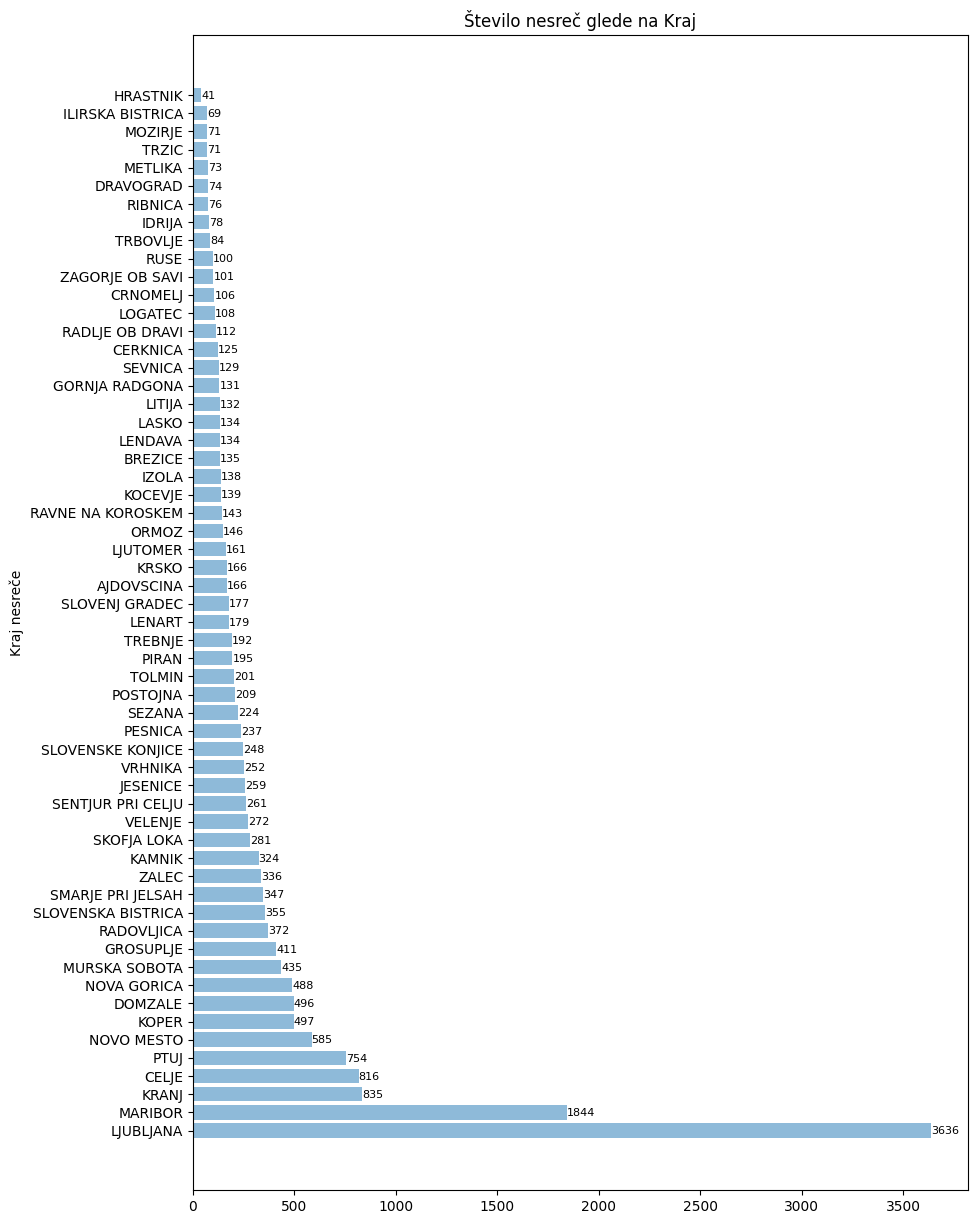

In [67]:
sorted_kraji = {k: v for k, v in sorted(kraji.items(), reverse=True, key=lambda item: item[1])}

kraji_nesrec = []
stNesrec = []

for kraj, value in sorted_kraji.items():
    if kraj not in kraji_nesrec:
            kraji_nesrec.append(kraj)
    
    stNesrec.append(value)

y_pos = np.arange(len(kraji_nesrec))

plt.figure(figsize=(10,15))
plt.barh(y_pos, stNesrec, align='center', alpha=0.5)
plt.yticks(y_pos, kraji_nesrec)
plt.ylabel('Kraj nesreče')
plt.title('Število nesreč glede na Kraj')
for i, v in enumerate(stNesrec):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)
plt.show()

 2. Št. nesreč glede na čas (uro)

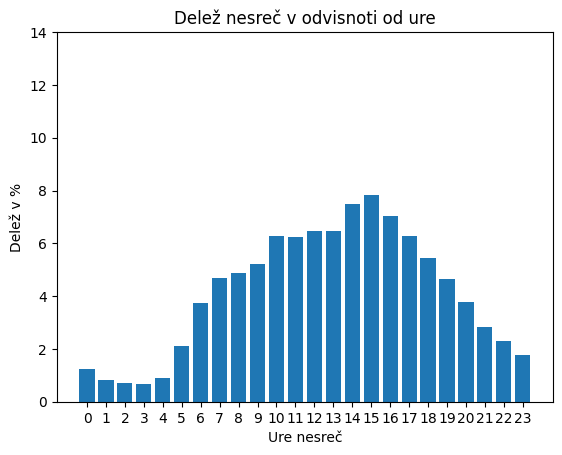

In [69]:
vse_nesrece = 0

for _, stevilo_nesrece in ureNesrec.items():
    vse_nesrece += stevilo_nesrece
    

nesrece = [(value / vse_nesrece) * 100.0 for _, value in ureNesrec.items()]
ure = [ura for ura, _ in ureNesrec.items()]

#plt.figure(figsize=(8,6))
plt.bar(ure, nesrece)
plt.title('Delež nesreč v odvisnoti od ure')
plt.ylabel('Delež v %')
plt.xlabel('Ure nesreč')
plt.xticks(np.arange(24))
plt.ylim(0, 14)
plt.show()

In [20]:
pearsonovaKorelacija = np.mean(((ure - np.mean(ure))*(nesrece-np.mean(nesrece)))/(np.std(ure)*np.std(nesrece)))
print("Pearsonova korelacija:", pearsonovaKorelacija)

Pearsonova korelacija: 0.409743805440589


3. Nesreče glede na tip vozila

In [21]:
tipiPrevoznihStredstev = dict()
smrtGledeNaVozilo = dict()

seznamNeVozil = ["pesec", "potnik"]

for _, udelezenci in udelezenciNesrec.items():
    for vozilo, poskodbe in udelezenci:
        if vozilo not in seznamNeVozil:
            if vozilo not in tipiPrevoznihStredstev:
                tipiPrevoznihStredstev[vozilo] = 1
            else:
                tipiPrevoznihStredstev[vozilo] += 1
                
            if poskodbe == "smrtni izid":
                if vozilo not in smrtGledeNaVozilo:
                    smrtGledeNaVozilo[vozilo] = 1
                else:
                    smrtGledeNaVozilo[vozilo] += 1



{'osebni avtomobil': 23957, 'tovorno vozilo': 2873, 'ostalo': 1804, 'kolesar': 1365, 'enosledno vozilo': 1087, 'avtobus': 340, 'traktor': 149, 'specialno vozilo': 38, 'delovni stroj': 30}


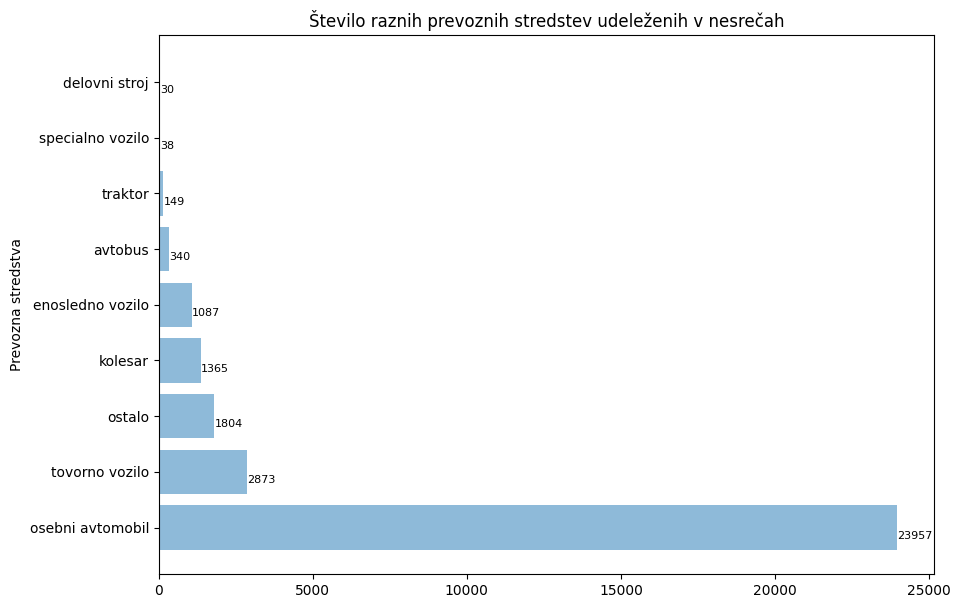

In [24]:
#Število posameznik prevoznih stredstev v nesrečah
            
tipiPrevoznihStredstev = {k: v for k, v in sorted(tipiPrevoznihStredstev.items(), reverse=True, key=lambda item: item[1])}

print(tipiPrevoznihStredstev)

stredstvo = []
stVkljucenih = []

for vozilo, value in tipiPrevoznihStredstev.items():
    if vozilo not in stredstvo:
            stredstvo.append(vozilo)
    
    stVkljucenih.append(value)

y_pos = np.arange(len(stredstvo))
plt.figure(figsize=(10,7))
plt.barh(y_pos, stVkljucenih, align='center', alpha=0.5)
plt.yticks(y_pos, stredstvo)
plt.ylabel('Prevozna stredstva')
plt.title('Število raznih prevoznih stredstev udeleženih v nesrečah')
for i, v in enumerate(stVkljucenih):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)
plt.show()

{'osebni avtomobil': 88, 'enosledno vozilo': 28, 'tovorno vozilo': 19, 'kolesar': 9, 'avtobus': 4, 'traktor': 2, 'ostalo': 1}


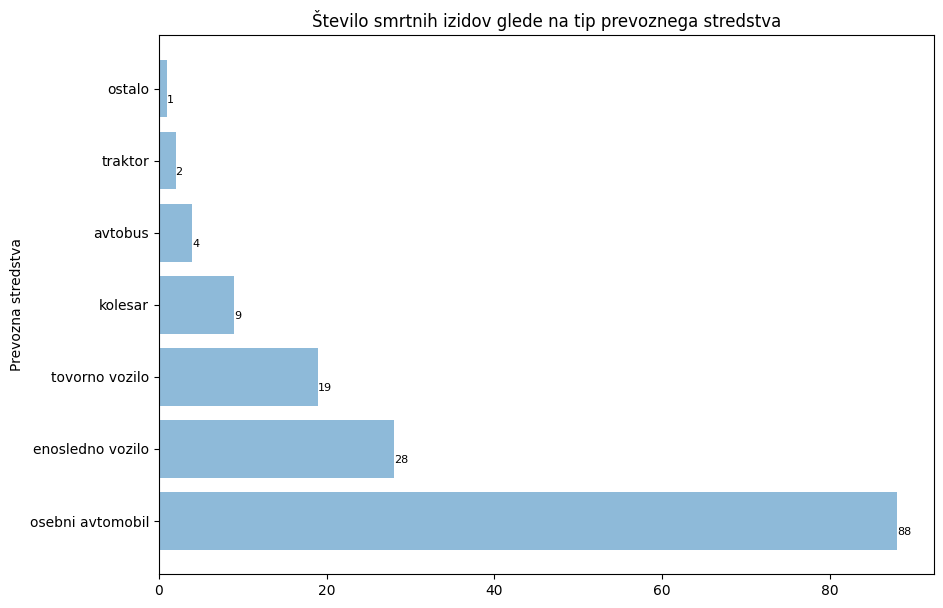

In [27]:
#Število smrtnih izidov glede na tip prevoznega stredstva

smrtGledeNaVozilo = {k: v for k, v in sorted(smrtGledeNaVozilo.items(), reverse=True, key=lambda item: item[1])}

print(smrtGledeNaVozilo)

stredstvo = []
stVkljucenih = []

for vozilo, value in smrtGledeNaVozilo.items():
    if vozilo not in stredstvo:
            stredstvo.append(vozilo)
    
    stVkljucenih.append(value)

y_pos = np.arange(len(stredstvo))
plt.figure(figsize=(10,7))
plt.barh(y_pos, stVkljucenih, align='center', alpha=0.5)
plt.yticks(y_pos, stredstvo)
plt.ylabel('Prevozna stredstva')
plt.title('Število smrtnih izidov glede na tip prevoznega stredstva')
for i, v in enumerate(stVkljucenih):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)
plt.show()

## Končni del popravek

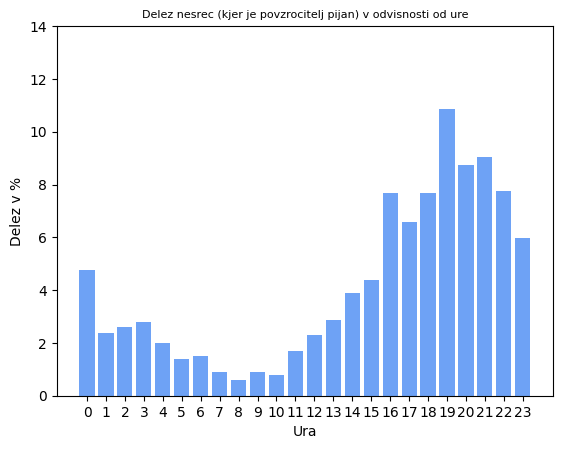

In [183]:
vsi = 0
ure_nesrec = dict()
for row in data:
    ura = int(row["UraPN"])
    alkotest = float("0" + row["VrednostAlkotesta"].replace(",", "."))
    if row["Povzrocitelj"] == "POVZROCITELJ":
        if alkotest > 0.5:
            if ura not in ure_nesrec.keys():
                ure_nesrec[ura] = 0
            ure_nesrec[ura] += 1
            vsi += 1;
        

s = sorted(ure_nesrec.keys())
ure_nesrec_sorted = dict()
for i in s:
    ure_nesrec_sorted[i] = (ure_nesrec.get(i) / vsi) * 100.0

#plt.figure(dpi = 120)
plt.bar(ure_nesrec_sorted.keys(), ure_nesrec_sorted.values(), color="#6ea2f5");
plt.title("Delez nesrec (kjer je povzrocitelj pijan) v odvisnosti od ure", fontsize=8)
plt.xlabel("Ura");
plt.xticks(s)
plt.ylim(0, 14)
plt.ylabel("Delez v %");

In [4]:
ureNesrecGost = dict()
ureNesrecRedek = dict()
ureNesrecNormalen = dict()
vsi = 0

for row in data:
    nesrecaId = int(row["ZaporednaStevilkaPN"])
    uraNesrece = int(row["UraPN"])
    stanjePrometa = row["StanjePrometa"]
    
    if stanjePrometa == "NORMALEN":
        if uraNesrece not in ureNesrecNormalen:
            ureNesrecNormalen[uraNesrece] = 1;
            vsi += 1
        elif nesrecaId not in ureNesrecNormalen:
            ureNesrecNormalen[uraNesrece] += 1;
            vsi += 1
    elif stanjePrometa == "GOST":
        if uraNesrece not in ureNesrecGost:
            ureNesrecGost[uraNesrece] = 1;
            vsi += 1
        elif nesrecaId not in ureNesrecGost:
            ureNesrecGost[uraNesrece] += 1;
            vsi += 1
    elif stanjePrometa == "REDEK":
        if uraNesrece not in ureNesrecRedek:
            ureNesrecRedek[uraNesrece] = 1;
            vsi += 1
        elif nesrecaId not in ureNesrecRedek:
            ureNesrecRedek[uraNesrece] += 1;
            vsi += 1

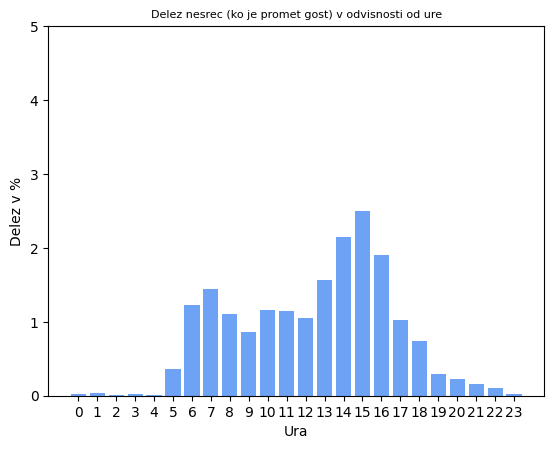

In [8]:
s = sorted(ureNesrecGost.keys())
ure_nesrec_sorted = dict()
for i in s:
    ure_nesrec_sorted[i] = (ureNesrecGost.get(i) / vsi) * 100.0

plt.bar(ure_nesrec_sorted.keys(), ure_nesrec_sorted.values(), color="#6ea2f5");
plt.title("Delez nesrec (ko je promet gost) v odvisnosti od ure", fontsize=8)
plt.xlabel("Ura");
plt.xticks(s)
plt.ylim(0, 5)
plt.ylabel("Delez v %"); 

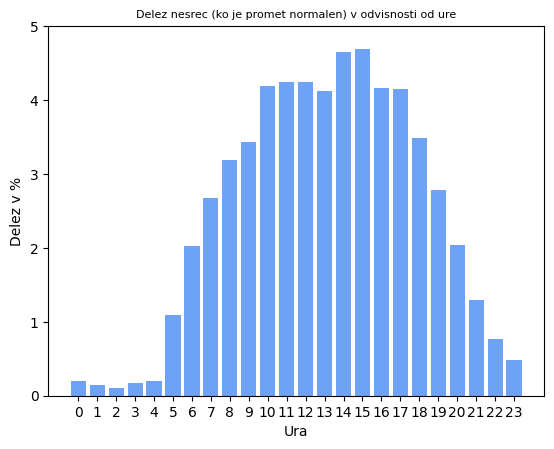

In [9]:
s = sorted(ureNesrecNormalen.keys())
ure_nesrec_sorted = dict()
for i in s:
    ure_nesrec_sorted[i] = (ureNesrecNormalen.get(i) / vsi) * 100.0

plt.bar(ure_nesrec_sorted.keys(), ure_nesrec_sorted.values(), color="#6ea2f5");
plt.title("Delez nesrec (ko je promet normalen) v odvisnosti od ure", fontsize=8)
plt.xlabel("Ura");
plt.xticks(s)
plt.ylim(0, 5)
plt.ylabel("Delez v %"); 

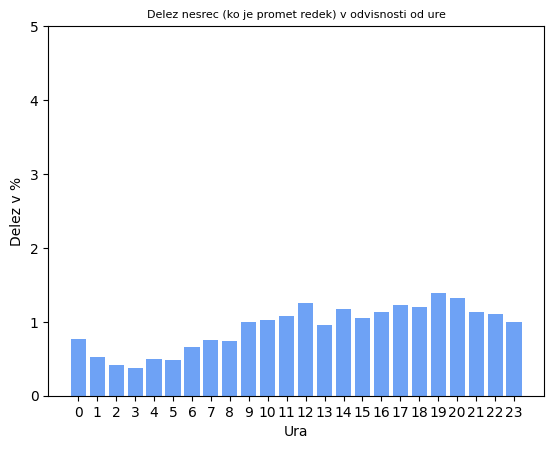

In [10]:
s = sorted(ureNesrecRedek.keys())
ure_nesrec_sorted = dict()
for i in s:
    ure_nesrec_sorted[i] = (ureNesrecRedek.get(i) / vsi) * 100.0

plt.bar(ure_nesrec_sorted.keys(), ure_nesrec_sorted.values(), color="#6ea2f5");
plt.title("Delez nesrec (ko je promet redek) v odvisnosti od ure", fontsize=8)
plt.xlabel("Ura");
plt.xticks(s)
plt.ylim(0, 5)
plt.ylabel("Delez v %"); 

In [188]:
slovenske_regije = {
    'NOVA GORICA': 'Goriška',
    'KOPER': 'Obalno-kraška',
    'LENDAVA': 'Pomurska',
    'POSTOJNA': 'Notranjsko-kraška',
    'RADLJE OB DRAVI': 'Koroška',
    'MARIBOR': 'Podravska',
    'SLOVENJ GRADEC': 'Koroška',
    'KAMNIK': 'Osrednjeslovenska',
    'JESENICE': 'Gorenjska',
    'NOVO MESTO': 'Jugovzhodna Slovenija',
    'CELJE': 'Savinjska',
    'GORNJA RADGONA': 'Pomurska',
    'MURSKA SOBOTA': 'Pomurska',
    'CERKNICA': 'Notranjsko-kraška',
    'TOLMIN': 'Goriška',
    'ZAGORJE OB SAVI': 'Zasavska',
    'DRAVOGRAD': 'Koroška',
    'DOMZALE': 'Osrednjeslovenska',
    'CRNOMELJ': 'Jugovzhodna Slovenija',
    'SKOFJA LOKA': 'Gorenjska',
    'SEZANA': 'Obalno-kraška',
    'KOCEVJE': 'Jugovzhodna Slovenija',
    'PIRAN': 'Obalno-kraška',
    'LENART': 'Podravska',
    'PTUJ': 'Podravska',
    'ORMOZ': 'Podravska',
    'RADOVLJICA': 'Gorenjska',
    'VRHNIKA': 'Osrednjeslovenska',
    'ZALEC': 'Savinjska',
    'VELENJE': 'Savinjska',
    'SMARJE PRI JELSAH': 'Savinjska',
    'IZOLA': 'Obalno-kraška',
    'SLOVENSKE KONJICE': 'Savinjska',
    'GROSUPLJE': 'Osrednjeslovenska',
    'KRANJ': 'Gorenjska',
    'AJDOVSCINA': 'Goriška',
    'SLOVENSKA BISTRICA': 'Podravska',
    'LOGATEC': 'Osrednjeslovenska',
    'SEVNICA': 'Spodnjeposavska',
    'TRZIC': 'Gorenjska',
    'TREBNJE': 'Jugovzhodna Slovenija',
    'PESNICA': 'Podravska',
    'SENTJUR PRI CELJU': 'Savinjska',
    'BREZICE': 'Spodnjeposavska',
    'ILIRSKA BISTRICA': 'Notranjsko-kraška',
    'LJUTOMER': 'Pomurska',
    'RAVNE NA KOROSKEM': 'Koroška',
    'MOZIRJE': 'Savinjska',
    'KRSKO': 'Spodnjeposavska',
    'RUSE': 'Podravska',
    'LITIJA': 'Zasavska',
    'RIBNICA': 'Jugovzhodna Slovenija',
    'LASKO': 'Savinjska',
    'IDRIJA': 'Goriška',
    'HRASTNIK': 'Zasavska',
    'TRBOVLJE': 'Zasavska',
    'METLIKA': 'Jugovzhodna Slovenija',
    'LJUBLJANA': 'Osrednjeslovenska'
}

def convert(kraj):
    return slovenske_regije[kraj]

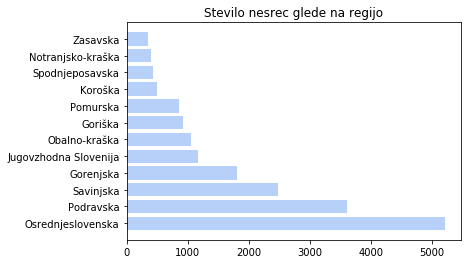

In [23]:
regije = dict()

for kraj, value in kraji.items():
    if convert(kraj) not in regije:
        regije[convert(kraj)] = value
    else:
        regije[convert(kraj)] += value

        
regije_sorted = {k: v for k, v in sorted(regije.items(), reverse=True, key=lambda item: item[1])}
y_pos = np.arange(len(regije_sorted.keys()))

plt.barh(y_pos, regije_sorted.values(), align='center', alpha=0.5, color="#6ea2f5")
plt.yticks(y_pos, regije_sorted.keys())
plt.title("Stevilo nesrec glede na regijo")
plt.show()

In [191]:
mesci = ["Januar", "Februar", "Marec", "April", "Maj", "Junij", "Julij", "Avgust", "September", "Oktober", "November", "December"]

nesrece_po_mescih = dict()

for row in data:
    datum = row["DatumPN"].split(".")[1]
    regija = convert(row["UpravnaEnotaStoritve"])
    nesrecaId = int(row["ZaporednaStevilkaPN"])
    
    mesec = mesci[int(datum) - 1]
    
    if mesec not in nesrece_po_mescih:
        nesrece_po_mescih[mesec] = [regija]
    elif nesrecaId not in nesrece_po_mescih[mesec]:
        nesrece_po_mescih[mesec].append(regija)


for mesec in nesrece_po_mescih.keys():
    nesrece_mesec = dict()
    
    for regija in nesrece_po_mescih[mesec]:
        if regija not in nesrece_mesec:
            nesrece_mesec[regija] = 1
        else:
            nesrece_mesec[regija] += 1
            
    sorted_nesrece_mesec = {k: v for k, v in sorted(nesrece_mesec.items(), reverse=True, key=lambda item: item[1])}
    y_pos = np.arange(len(sorted_nesrece_mesec.keys()))

    df = pd.DataFrame(columns=["Regija", "St. nesrec"])
    df["Regija"] = sorted_nesrece_mesec.keys()
    df["St. nesrec"] = sorted_nesrece_mesec.values()
    
    print("\n" + mesec)
    display(df)
    
    """
    plt.barh(y_pos, sorted_nesrece_mesec.values(), align='center', alpha=0.5)
    plt.yticks(y_pos, sorted_nesrece_mesec.keys())
    plt.title(mesec)
    plt.show()
    """



Januar


,Regija,St. nesrec
0,Osrednjeslovenska,727
1,Podravska,461
2,Savinjska,338
3,Gorenjska,234
4,Jugovzhodna Slovenija,139
5,Pomurska,117
6,Obalno-kraška,90
7,Goriška,89
8,Koroška,87
9,Spodnjeposavska,62



Februar


,Regija,St. nesrec
0,Osrednjeslovenska,641
1,Podravska,478
2,Savinjska,281
3,Gorenjska,195
4,Jugovzhodna Slovenija,140
5,Obalno-kraška,132
6,Goriška,115
7,Pomurska,81
8,Koroška,51
9,Zasavska,43



Marec


,Regija,St. nesrec
0,Osrednjeslovenska,774
1,Podravska,507
2,Savinjska,336
3,Gorenjska,213
4,Jugovzhodna Slovenija,176
5,Goriška,121
6,Pomurska,115
7,Obalno-kraška,111
8,Koroška,69
9,Spodnjeposavska,66



April


,Regija,St. nesrec
0,Osrednjeslovenska,786
1,Podravska,512
2,Savinjska,408
3,Gorenjska,225
4,Jugovzhodna Slovenija,153
5,Obalno-kraška,125
6,Goriška,117
7,Pomurska,101
8,Spodnjeposavska,72
9,Koroška,66



Julij


,Regija,St. nesrec
0,Osrednjeslovenska,775
1,Podravska,557
2,Savinjska,350
3,Gorenjska,347
4,Jugovzhodna Slovenija,193
5,Obalno-kraška,188
6,Goriška,157
7,Pomurska,111
8,Spodnjeposavska,77
9,Notranjsko-kraška,69



Maj


,Regija,St. nesrec
0,Osrednjeslovenska,811
1,Podravska,542
2,Savinjska,401
3,Gorenjska,258
4,Jugovzhodna Slovenija,169
5,Obalno-kraška,148
6,Koroška,114
7,Goriška,106
8,Pomurska,85
9,Spodnjeposavska,71



Junij


,Regija,St. nesrec
0,Osrednjeslovenska,923
1,Podravska,592
2,Savinjska,444
3,Gorenjska,309
4,Obalno-kraška,223
5,Goriška,202
6,Jugovzhodna Slovenija,189
7,Pomurska,129
8,Koroška,75
9,Spodnjeposavska,68



Avgust


,Regija,St. nesrec
0,Osrednjeslovenska,719
1,Podravska,472
2,Savinjska,372
3,Gorenjska,358
4,Obalno-kraška,231
5,Jugovzhodna Slovenija,149
6,Goriška,122
7,Pomurska,101
8,Koroška,93
9,Notranjsko-kraška,87



September


,Regija,St. nesrec
0,Osrednjeslovenska,933
1,Podravska,602
2,Savinjska,403
3,Gorenjska,270
4,Obalno-kraška,183
5,Jugovzhodna Slovenija,163
6,Goriška,154
7,Pomurska,143
8,Spodnjeposavska,87
9,Notranjsko-kraška,79



Oktober


,Regija,St. nesrec
0,Osrednjeslovenska,989
1,Podravska,663
2,Savinjska,467
3,Gorenjska,288
4,Jugovzhodna Slovenija,192
5,Goriška,170
6,Obalno-kraška,163
7,Pomurska,155
8,Koroška,101
9,Spodnjeposavska,76



November


,Regija,St. nesrec
0,Osrednjeslovenska,858
1,Podravska,567
2,Savinjska,388
3,Gorenjska,191
4,Jugovzhodna Slovenija,185
5,Obalno-kraška,153
6,Goriška,137
7,Pomurska,117
8,Zasavska,69
9,Koroška,68



December


,Regija,St. nesrec
0,Osrednjeslovenska,791
1,Podravska,610
2,Savinjska,341
3,Gorenjska,225
4,Jugovzhodna Slovenija,184
5,Obalno-kraška,131
6,Pomurska,124
7,Goriška,111
8,Koroška,74
9,Notranjsko-kraška,70
